<h1><center>Dynamic Modeling of Combined Concentrating Solar Tower and Parabolic Trough for
Increased Day-to-Day Performance</center></h1>

<ipython-input-11-a079f45e58e3>:19: UserWarning: The following kwargs were not used by contour: 'linewidth'
  C = contour(X, Y, Z, 8, colors='black', linewidth=.5)


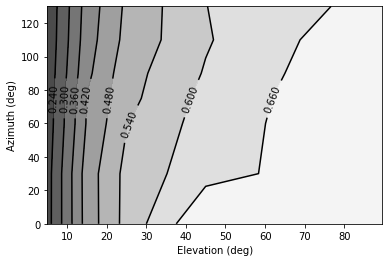

In [11]:
import numpy as np
from pylab import *
from scipy import interpolate

x = [5,15,25,45,65,89.5]
#x = [90 - x1]
y = [0,30,60,75,90,110,130]
Z = np.array([[0.216,0.446,0.560,0.719,0.684,0.683],
[0.215,0.448,0.558,0.640,0.670,0.683],
[0.206,0.425,0.537,0.626,0.671,0.686],
[0.204,0.423,0.522,0.618,0.668,0.672],
[0.199,0.405,0.516,0.605,0.660,0.682],
[0.194,0.392,0.498,0.594,0.655,0.687],
[0.192,0.385,0.491,0.599,0.641,0.681]])

X,Y = np.meshgrid(x,y)

contourf(X, Y, Z, 8, alpha=.75, cmap='gray')
C = contour(X, Y, Z, 8, colors='black', linewidth=.5)
xlabel('Elevation (deg)'), ylabel('Azimuth (deg)')
clabel(C)
show()

#rbf = interpolate.Rbf(X.ravel(), Y.ravel(), Z.ravel(), smooth=0.000001)
#X2,Y2 = np.meshgrid(x,y)
#c3 = contourf(X2, Y2, rbf(X2, Y2))
#C2 = contour(X2, Y2, rbf(X2, Y2), 8, colors='black', linewidth=.5)
#xlabel('Elevation (deg)'), ylabel('Azimuth (deg)')
#clabel(C2)
#show()

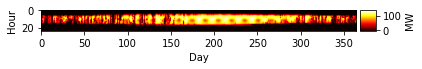

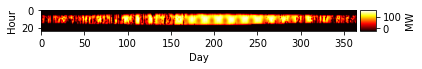

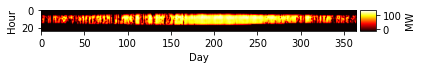

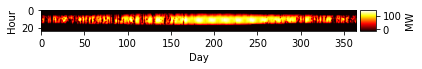

In [2]:
heatmap2d(tow_xyz.T)
heatmap2d(tro_xyz.T)
heatmap2d(combiNS_xyz.T)
heatmap2d(combiEW_xyz.T)

2044098.98
1822865.26


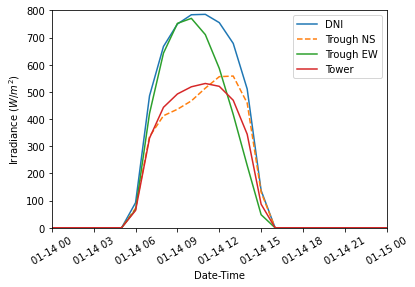

In [11]:
from SolarGeometry_hoy import *
from CSP import *
from scipy import integrate
plot(ineichen().dni)
plot(ineichen().dni*costhetai_NS()*IAM_tro(hoy), linestyle='dashed')
plot(ineichen().dni*costhetai_EW()*IAM_tro(hoy))
plot(ineichen().dni*IAM_tow(hoy))

xlim(18275,18276),ylim(0,800)
xlabel('Date-Time'),ylabel('Irradiance ($W/m^2$)')
tower = solarII(ineichen().dni,1,IAM_tow(hoy),225000,99.3)
trough = di_sst(ineichen().dni,costhetai_NS(),IAM_tro(hoy),Tr, 5.76, 0.07, 18, 25, 1800)
legend(('DNI','Trough NS','Trough EW','Tower','tower','trough'))
xticks(rotation=30)
Ens = integrate.trapz(ineichen().dni*costhetai_NS()*IAM_tro(hoy)).round(2)
Eew = integrate.trapz(ineichen().dni*costhetai_EW()*IAM_tro(hoy)).round(2)
Etow = integrate.trapz(ineichen().dni*IAM_tow(hoy)).round(2)
print(Ens)
print(Eew)
Etow
savefig('Jan.png')

2044098.98
1822865.26


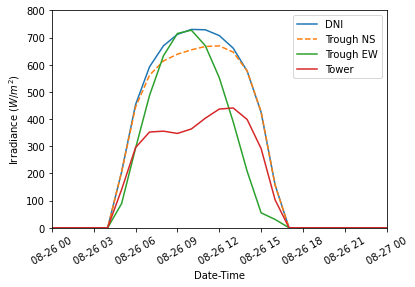

In [10]:
from SolarGeometry_hoy import *
from CSP import *
from scipy import integrate
plot(ineichen().dni)
plot(ineichen().dni*costhetai_NS()*IAM_tro(hoy), linestyle='dashed')
plot(ineichen().dni*costhetai_EW()*IAM_tro(hoy))
plot(ineichen().dni*IAM_tow(hoy))

xlim(18500,18501),ylim(0,800)
xlabel('Date-Time'),ylabel('Irradiance ($W/m^2$)')
tower = solarII(ineichen().dni,1,IAM_tow(hoy),225000,99.3)
trough = di_sst(ineichen().dni,costhetai_NS(),IAM_tro(hoy),Tr, 5.76, 0.07, 18, 25, 1800)
legend(('DNI','Trough NS','Trough EW','Tower','tower','trough'))
xticks(rotation=30)
Ens = integrate.trapz(ineichen().dni*costhetai_NS()*IAM_tro(hoy)).round(2)
Eew = integrate.trapz(ineichen().dni*costhetai_EW()*IAM_tro(hoy)).round(2)
Etow = integrate.trapz(ineichen().dni*IAM_tow(hoy)).round(2)
print(Ens)
print(Eew)
Etow
savefig('Aug.png')

In [26]:
index = ['Total aperture area $(m^2)$',
         'Geometrical concentration',
         'Power (MW)',
         'Annual energy (MWh)',
         'Capacity factor',
         'DPB',
         'NPV',
         'IRR',
         'Cash flows']
tow_scenaria = pd.DataFrame(transpose(tow_scenaria), index=index).round(2)
#np.savetxt(r'C:\Users\gearn\+MyScripts\Solar\tables\tow.txt', tow_scenaria.iloc[:8].values, fmt='%d')
tow_scenaria.iloc[:8].to_csv('tow.csv')
tow_scenaria.iloc[:8]

,0,1,2,3,4,5
Total aperture area $(m^2)$,75000,85000,95000,105000,115000,125000
Geometrical concentration,755.287,855.992,956.697,1057.4,1158.11,1258.81
Power (MW),17.3385,19.8417,22.3449,24.8481,27.3512,29.8544
Annual energy (MWh),26418.4,31617.2,36816,42014.7,47213.5,52412.3
Capacity factor,0.173937,0.181903,0.188085,0.193021,0.197054,0.20041
DPB,10.3018,9.26723,8.60016,8.1252,7.78061,7.5161
NPV,1.91129e+07,2.59358e+07,3.27586e+07,3.95815e+07,4.64044e+07,5.32273e+07
IRR,0.0211415,0.0362744,0.0501087,0.0630318,0.0752899,0.0870489


In [22]:
trough_scenaria = pd.DataFrame(transpose(trough_scenaria), index=index).round(2)
trough_scenaria.iloc[:8]

,0,1,2,3,4,5
Total aperture area $(m^2)$,115200,129600,144000,158400,172800,187200
Geometrical concentration,82.2857,82.2857,82.2857,82.2857,82.2857,82.2857
Power (MW),25.2969,28.459,31.6211,34.7832,37.9453,41.1074
Annual energy (MWh),29698.8,33411.1,37123.5,40835.8,44548.2,48260.5
Capacity factor,0.134019,0.134019,0.134019,0.134019,0.134019,0.134019
DPB,22.5309,22.3031,22.1219,21.9765,21.8642,21.7695
NPV,3.99074e+06,4.69092e+06,5.3911e+06,6.09129e+06,6.79147e+06,7.49163e+06
IRR,0.0988817,0.0992755,0.0995903,0.0998477,0.100062,0.100243


In [7]:
troughew_scenaria = pd.DataFrame(transpose(troughew_scenaria), index=index).round(2)
troughew_scenaria.iloc[:8]

,0,1,2,3,4,5
Total aperture area $(m^2)$,115200,129600,144000,158400,172800,187200
Geometrical concentration,82.2857,82.2857,82.2857,82.2857,82.2857,82.2857
Power (MW),25.7192,28.9341,32.149,35.3639,38.5789,41.7938
Annual energy (MWh),20321.3,22861.5,25401.7,27941.9,30482,33022.2
Capacity factor,0.0901967,0.0901967,0.0901967,0.0901967,0.0901966,0.0901966
DPB,22.5309,22.3031,22.1219,21.9765,21.8642,21.7695
NPV,3.99074e+06,4.69092e+06,5.3911e+06,6.09129e+06,6.79147e+06,7.49163e+06
IRR,0.0988817,0.0992755,0.0995903,0.0998477,0.100062,0.100243


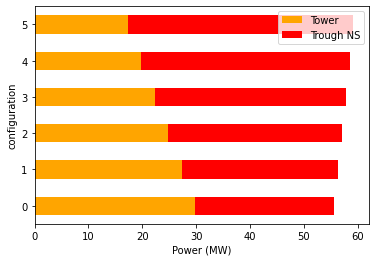

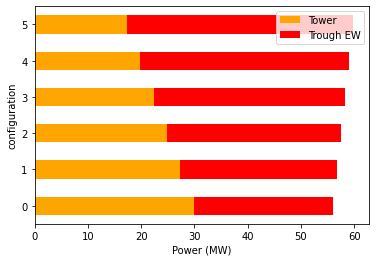

In [9]:
tow = [17.3385,19.8417,22.3449,24.8481,27.3512,29.8544]
trons = [41.8438,38.6251,35.4063,32.1876,28.9688,25.7501]
troew = [42.5302,39.2586,35.9871,32.7155,29.444,26.1724]
index = ['Tower','Trough NS']
df = pd.DataFrame({'Tower':tow[::-1],'Trough NS':trons[::-1]})
ax = df.plot.barh(stacked=True, color = ('orange','r'))
ylabel('configuration'),xlabel('Power (MW)')
savefig('Fig4a.png')

df2 = pd.DataFrame({'Tower':tow[::-1],'Trough EW':troew[::-1]})
ax = df2.plot.barh(stacked=True, color = ('orange','r'))
ylabel('configuration'),xlabel('Power (MW)')
savefig('Fig4b.png')